In [ ]:
!pip install eleanor

     |████████████████████████████████| 6.7 MB 7.6 MB/s 
     |████████████████████████████████| 832 kB 42.9 MB/s 
     |████████████████████████████████| 245 kB 54.7 MB/s 
     |████████████████████████████████| 4.4 MB 44.4 MB/s 
     |████████████████████████████████| 110.5 MB 377 bytes/s 
     |████████████████████████████████| 22.3 MB 9.7 MB/s 
     |████████████████████████████████| 41 kB 259 kB/s 
     |████████████████████████████████| 98 kB 8.7 MB/s 
     |████████████████████████████████| 802 kB 44.7 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 3.2 MB 37.8 MB/s 
     |████████████████████████████████| 3.8 MB 37.4 MB/s 
     |████████████████████████████████| 503 kB 62.1 MB/s 
     |████████████████████████████████| 50 kB 8.9 MB/s 
     |████████████████████████████████| 2.9 MB 31.7 MB/s 
     |████████████████████████████████| 20.1 MB 1.3 MB/s 
  Created wheel for eleanor: filename=eleanor-2.0.3-py2.py3-none-any.whl size

In [ ]:
import eleanor

In [ ]:
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord

In [ ]:
star = eleanor.Source(name='WASP-101', sector=6)

Most recent sector available =  39
Inflating...
This is the first light curve you have made for this sector. Getting eleanor metadata products for Sector  6...
This will only take a minute, and only needs to be done once. Any other light curves you make in this sector will be faster.
Acquiring target...
Calculating Cadences...
Assuring Quality Flags...
Making CBVs...
Success! Sector  6 now available.


/usr/local/lib/python3.7/dist-packages/eleanor/ffi.py:40: UserWarning: couldn't find pointing model
  warnings.warn("couldn't find pointing model")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install lightkurve

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
search_result = lk.search_lightcurve('WASP-101', mission='TESS')
search_result[0]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 06,2018,SPOC,120,47911178,0.0


In [ ]:
for column in search_result.table.columns:
    print(column)

dataproduct_type
calib_level
obs_collection
obs_id
target_name
s_ra
s_dec
t_min
t_max
t_exptime
wavelength_region
filters
em_min
em_max
target_classification
obs_title
t_obs_release
instrument_name
proposal_pi
proposal_id
proposal_type
project
sequence_number
provenance_name
s_region
jpegURL
dataURL
dataRights
mtFlag
srcDen
intentType
obsid
objID
objID1
distance
exptime
obsID
obs_collection_products
dataproduct_type_products
description
type
dataURI
productType
productGroupDescription
productSubGroupDescription
productDocumentationURL
project_products
prvversion
proposal_id_products
productFilename
size
parent_obsid
dataRights_products
calib_level_products
author
mission
#
year
sort_order


In [ ]:
import numpy as np
s_index = np.where(search_result.table['s_region'])[0]
search_result[s_index]

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 06,2018,SPOC,120,47911178,0.0
1,TESS Sector 06,2018,TESS-SPOC,1800,47911178,0.0
2,TESS Sector 06,2018,QLP,1800,47911178,0.0
3,TESS Sector 33,2020,SPOC,20,47911178,0.0
4,TESS Sector 33,2020,SPOC,120,47911178,0.0
5,TESS Sector 33,2020,TESS-SPOC,600,47911178,0.0


In [ ]:
search_result_s6 = lk.search_lightcurve('WASP-101', mission='TESS', sector=6)[2]
search_result_s6

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 06,2018,QLP,1800,47911178,0.0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

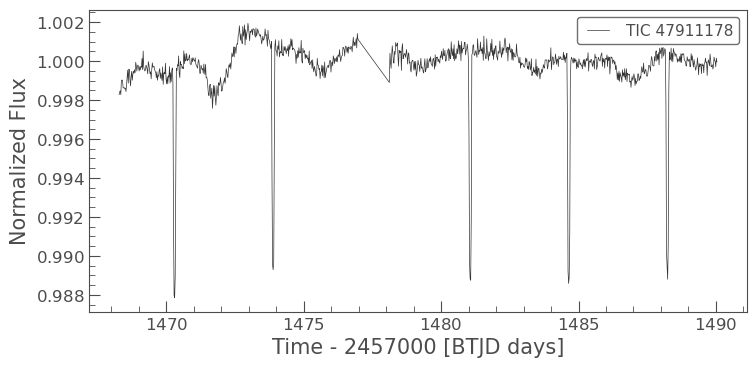

In [ ]:
lc = search_result_s6.download()
lc.plot()

In [ ]:
lc_collection = search_result[:5].download_all()
lc_collection

LightCurveCollection of 5 objects:
    0: <TessLightCurve LABEL="TIC 47911178" SECTOR=6 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    1: <TessLightCurve LABEL="TIC 47911178" SECTOR=6 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    2: <TessLightCurve LABEL="TIC 47911178" SECTOR=6 AUTHOR=QLP FLUX_ORIGIN=sap_flux>
    3: <TessLightCurve LABEL="TIC 47911178" SECTOR=33 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>
    4: <TessLightCurve LABEL="TIC 47911178" SECTOR=33 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

/srv/conda/envs/notebook/lib/python3.6/site-packages/lightkurve/collections.py:266: LightkurveWarning: Some but not all of the light curves in the collection appear to be normalized. You may wish to use `normalize=True` to ensure all are normalized.
  LightkurveWarning,


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux'>

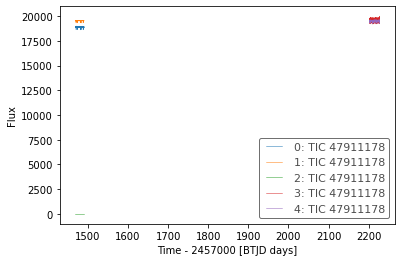

In [ ]:
# Create a larger figure for clarity
fig, ax = plt.subplots(figsize=(20,5))
# Plot the light curve collection
lc_collection.plot(ax=ax)

/srv/conda/envs/notebook/lib/python3.6/site-packages/lightkurve/lightcurve.py:1056: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  LightkurveWarning,


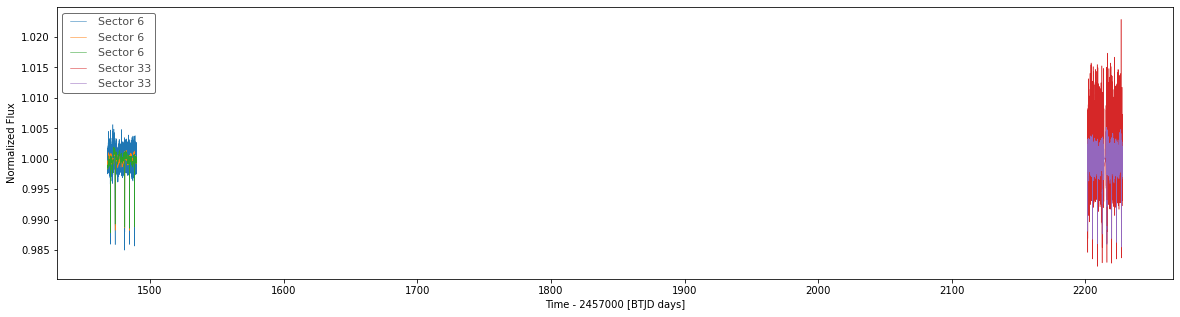

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
for lc in lc_collection:
    lc.normalize().plot(ax=ax, label=f'Sector {lc.sector}')

In [ ]:
search_result_tpf = lk.search_targetpixelfile('WASP-101')
search_result_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 06,2018,SPOC,120,47911178,0.0
1,TESS Sector 06,2018,TESS-SPOC,1800,47911178,0.0
2,TESS Sector 33,2020,SPOC,20,47911178,0.0
3,TESS Sector 33,2020,SPOC,120,47911178,0.0
4,TESS Sector 33,2020,TESS-SPOC,600,47911178,0.0


In [ ]:
tpf = search_result_tpf.download()

/srv/conda/envs/notebook/lib/python3.6/site-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 5 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


<AxesSubplot:title={'center':'Target ID: 47911178, Cadence: 173388'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

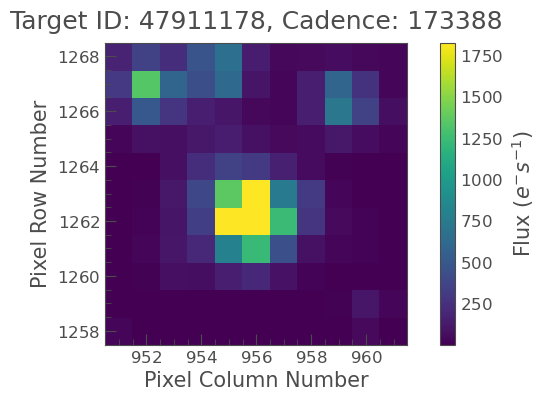

In [ ]:
tpf.plot()

In [ ]:
tpf_collection = search_result_tpf.download_all()
tpf_collection

TargetPixelFileCollection of 5 objects:
    0: TessTargetPixelFile(TICID: 47911178)
    1: TessTargetPixelFile(TICID: 47911178)
    2: TessTargetPixelFile(TICID: 47911178)
    3: TessTargetPixelFile(TICID: 47911178)
    4: TessTargetPixelFile(TICID: 47911178)

array([<AxesSubplot:title={'center':'Target ID: 47911178, Cadence: 173388'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>,
       <AxesSubplot:title={'center':'Target ID: 47911178, Cadence: 11560'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>,
       <AxesSubplot:title={'center':'Target ID: 47911178, Cadence: 4208880'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>,
       <AxesSubplot:title={'center':'Target ID: 47911178, Cadence: 701480'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>,
       <AxesSubplot:title={'center':'Target ID: 47911178, Cadence: 140296'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>],
      dtype=object)

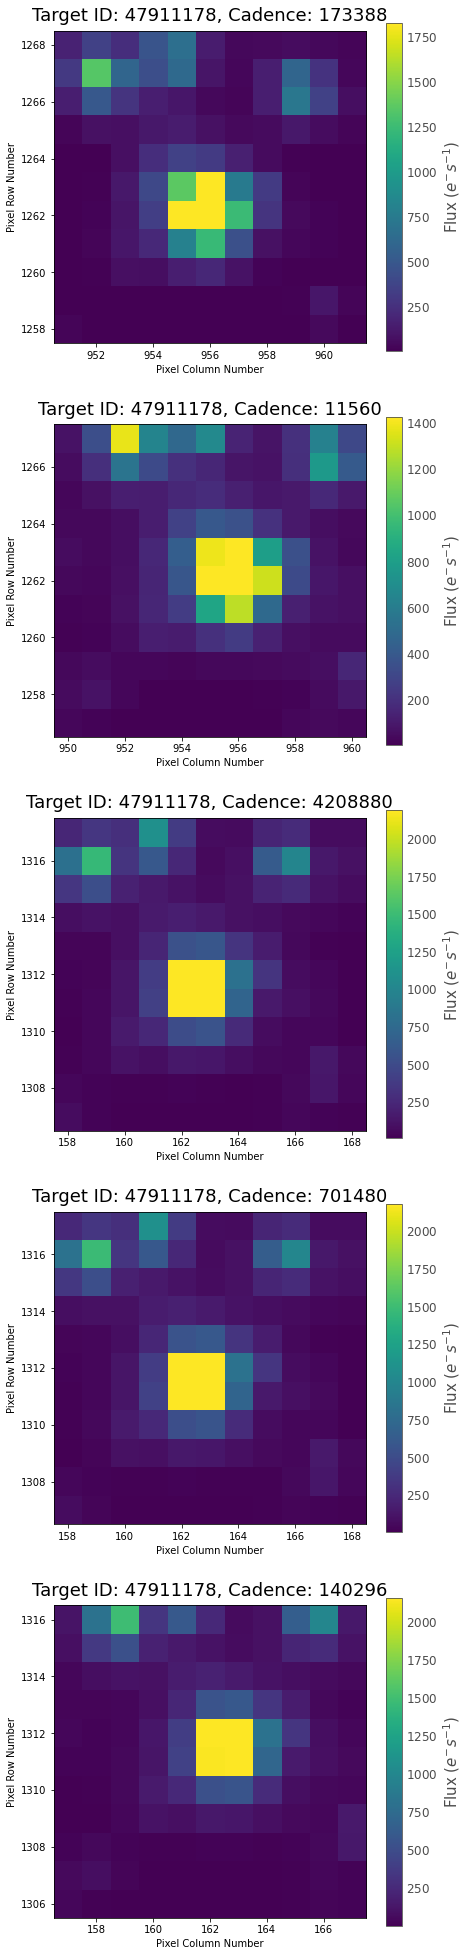

In [ ]:
tpf_collection.plot()

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

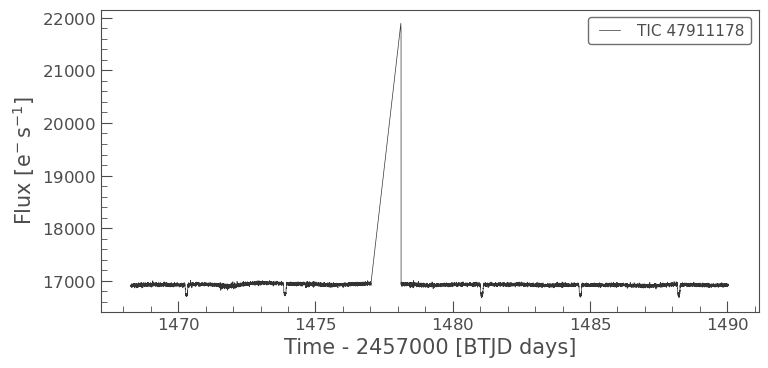

In [ ]:
lc = tpf.to_lightcurve()
lc.plot()

In [ ]:
search_result_ffi = lk.search_tesscut('WASP-101')
search_result_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 06,2018,TESScut,1426,WASP-101,0.0
1,TESS Sector 33,2020,TESScut,475,WASP-101,0.0


<AxesSubplot:title={'center':'Target ID: WASP-101, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

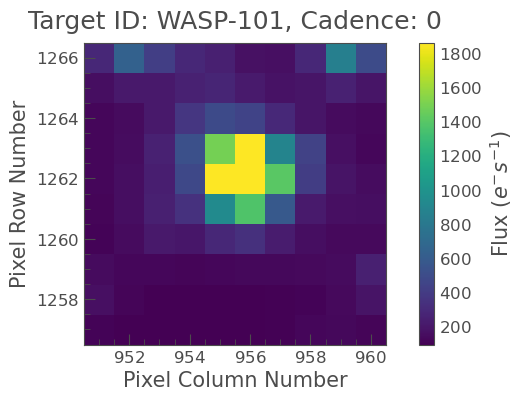

In [ ]:

tpf_cutout = search_result_ffi[0].download(cutout_size=10)
tpf_cutout.plot()

In [ ]:
search_result = lk.search_targetpixelfile('WASP-101', radius=180.,sector=6)
print(search_result)

SearchResult containing 2 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 06 2018      SPOC     120    47911178      0.0
  1 TESS Sector 06 2018 TESS-SPOC    1800    47911178      0.0


In [ ]:
lk.show_citation_instructions()